# Sampled video EDA
Just a short notebook to get a few insights into how the video database looks. 
Main objective is to get a feeling for the distribution of the views, likes and dislikes and how they correlate. 


In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import fabulus

import pandas as pd
import src.eda.eda_util as eda_util
from src.preprocessing.indexer import Indexer

import os
%pwd
%matplotlib inline

In [2]:
WDIR = 'H:\\Workspaces\\Projects\\PR_data_science\\src\\eda'
os.chdir(WDIR+'\\..\\..')
os.getcwd()

'H:\\Workspaces\\Projects\\PR_data_science'

In [3]:
# Fetch the data
X_train, X_test, y_train, y_test = Indexer.load_split('cache/tts_42')
df = X_train.append(X_test)
y = y_train.append(y_test)
df = eda_util.get_metaframe(df)
df.rename(columns={0: 'v_id', 1: 'n_samples'}, inplace=True)  # Backwards compatibility
df['viewcounts'] = y

# Replacing NaN's with 0 as these videos have 0 likes/dislikes
# TODO maybe replace with -1 to distinguish with real 0. 
df.fillna(value=0, inplace=True) 



## General Overview

At first, let us look at some sample rows:

In [5]:
# Showing some sample rows
df.head()



,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
9323,P6wJiweByng,30,Stop Coming to My House,Mogwai,1240.0,26.0,299.0,4.917851,292400
4969,yqkamXgTjF4,30,Хамелеон,Lumen,23.0,0.0,180.0,5.000000,3937
4789,PZuLsz4yPPM,30,Breathing Underwater,Metric,19918.0,407.0,239.0,4.919901,3201230
2673,mVObfpaR2_I,30,Thugz Mansion,2Pac,86034.0,2608.0,248.0,4.882313,12454780
8267,m4tJSn0QtME,30,Long Train Running,The Doobie Brothers,77237.0,3214.0,222.0,4.840201,13226400


Afterwards, we compute some summary statistics of the data:

In [27]:
# Compute summary statistics
df.describe()

,n_samples,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
count,10383.0,1.038300e+04,1.038300e+04,10383.000000,10383.000000,1.038300e+04
mean,30.0,1.736993e+05,7.550843e+03,253.659540,4.882782,3.527945e+07
std,0.0,6.263650e+05,4.332213e+04,116.590743,0.128684,1.348261e+08
min,30.0,0.000000e+00,0.000000e+00,35.000000,0.000000,2.100000e+01
25%,30.0,1.512000e+03,3.200000e+01,209.000000,4.865543,2.180730e+05
50%,30.0,1.170700e+04,2.850000e+02,238.000000,4.904043,2.024567e+06
75%,30.0,7.367900e+04,2.108500e+03,276.000000,4.932036,1.375550e+07
max,30.0,1.200607e+07,1.555113e+06,4478.000000,5.000000,2.953195e+09


## Viewcounts
The viewcounts of all videos are inspected in this part, in order to get a feeling 
how the viewcounts of music-videos of all genres are distributed:

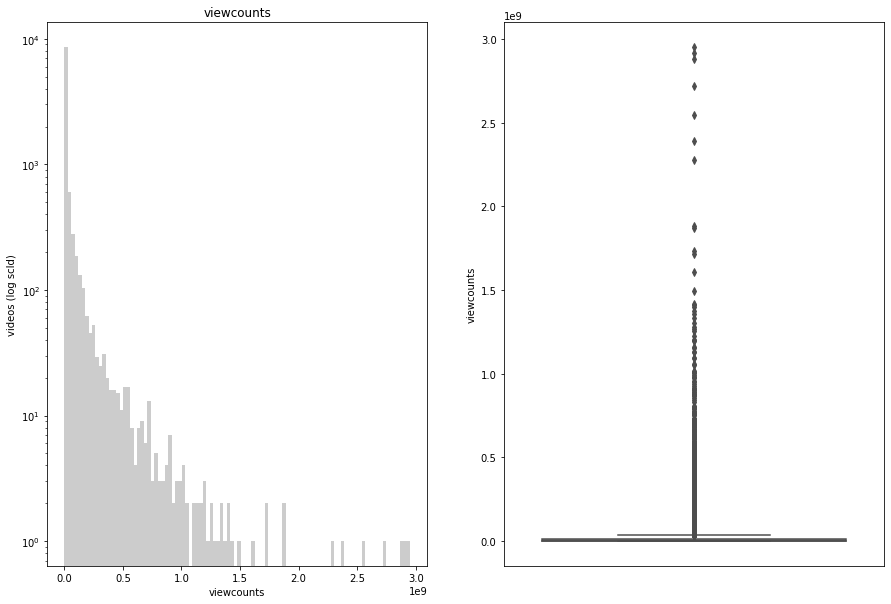

In [28]:
def plot_attribute(key: str, scale: str ='linear', color:str='grey', 
                   figsize:tuple=(15,10), kde: bool =False):
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=figsize)
    ax[0].set(yscale=scale)
    sns.distplot(df[key].to_numpy(), bins=100, color=color, kde=kde, ax=ax[0])
    ax[0].set_title(key)
    ax[0].set_xlabel(key)
    ax[0].set_ylabel('videos' if scale is 'linear' else 'videos (log scld)')
    
    sns.boxplot(data=df[key].to_numpy(), color=color, ax=ax[1])
    ax[1].set_ylabel(key)
    ax[1].set_xticks([])
    plt.show()
    
plot_attribute('viewcounts', 'log')

When looking at the histogram describing the viewcount distribution it looks like an 
exponential distribution. We also want to remark that the y-scale of the histogram is logarithmic, 
as otherwise we would only encounter a peak at 0.  
Furthermore, the boxplot on the right shows that approximately $75$% of the videos in the dataset have viewcounts between
approximately 350k and 13kk views. Also there are many outliers and extremal points towards 3billion views.
As a result, it can be said that there is a majority of less viewed or less popular music-videos in the dataset mixed 
with a few very popular videos. 
The overall distribution of the views seems to behave exponential. 

#### Least viewed
In the following we look at the least viewed videos:

In [29]:
sorted_views = df.sort_values(by=['viewcounts'], ascending=True)
sorted_views.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
45,-FeCW1JfnCE,30,Future Past,Geneva Jacuzzi,4.0,0.0,82.0,5.0,21
1174,7SgI_9u9A9c,30,В наших глазах,Кино,4.0,0.0,172.0,5.0,42
995,EGGbzLspma4,30,His Name Is Mutty Ranks,A Tribe Called Quest,1.0,0.0,116.0,5.0,85
7682,vURmrSGntcw,30,Живое,Flёur,2.0,0.0,249.0,5.0,87
4682,UjiWLgdFICs,30,A Shot In the Dark,A Day to Remember,2.0,0.0,225.0,5.0,87


#### Most viewed
Furthermore, we also get a peek on the most viewed videos:

In [30]:
sorted_views.tail()[::-1]

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
1224,CevxZvSJLk8,30,Roar,Katy Perry,10337849.0,834301.0,269.0,4.701293,2953194541
3954,hT_nvWreIhg,30,Counting Stars,OneRepublic,10910764.0,379936.0,283.0,4.865398,2916274115
2611,lp-EO5I60KA,30,Thinking Out Loud,Ed Sheeran,10733276.0,480611.0,297.0,4.828566,2878210876
4381,0KSOMA3QBU0,30,Dark Horse,Katy Perry,9700774.0,1112115.0,225.0,4.588596,2721476508
719,RBumgq5yVrA,30,Let Her Go,Passenger,9722598.0,325193.0,254.0,4.870542,2546728867


## Likes
The next step is to look on how the likes of the music videos are distributed:

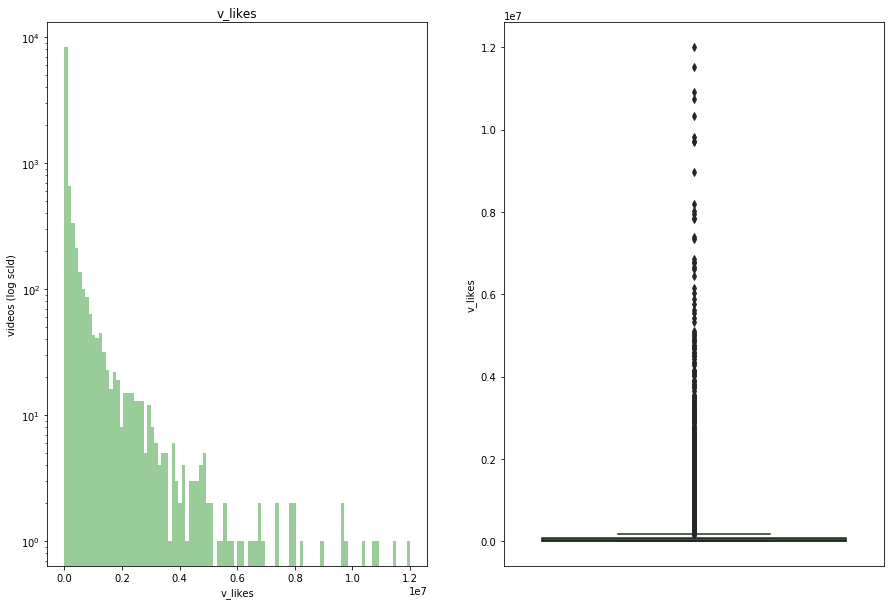

In [31]:
plot_attribute('v_likes', 'log', color='green')

Their distribution seems to be fairly equal to the distribution of the views also 
suggesting an underlying exponential distribution. Please also note that the y-axis is log-scaled.

#### Least liked
In the following we look at the least liked videos:

In [32]:
sorted_likes = df.sort_values(by=['v_likes'], ascending=True)
sorted_likes.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
4508,HbSvs8VZStE,30,On the Wing,Owl City,0.0,0.0,330.0,4.936663,740940
9813,911GFmPGJcI,30,Les métamorphoses du vide,Chapelier Fou,0.0,0.0,162.0,4.946667,30824
5065,ovox258unME,30,Jerusalem,Anouk,0.0,0.0,236.0,4.815974,734380
2818,mqhkyQ6bP6A,30,Roland,Interpol,0.0,0.0,284.0,4.932039,28591
1877,W5FfJ89rGPc,30,Why Can't We Be Friends?,War,0.0,0.0,222.0,4.924011,3221211


#### Most liked
Furthermore, we also get a peek on the most liked videos:

In [33]:
sorted_likes.tail()[::-1]

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
4141,2Vv-BfVoq4g,30,This,Ed Sheeran,12006069.0,475809.0,280.0,4.847520,2278056368
2252,XbGs_qK2PQA,30,Rap God,Eminem,11524278.0,384222.0,369.0,4.870942,979811289
3954,hT_nvWreIhg,30,Counting Stars,OneRepublic,10910764.0,379936.0,283.0,4.865398,2916274115
2611,lp-EO5I60KA,30,Thinking Out Loud,Ed Sheeran,10733276.0,480611.0,297.0,4.828566,2878210876
1224,CevxZvSJLk8,30,Roar,Katy Perry,10337849.0,834301.0,269.0,4.701293,2953194541


## Dislikes
Same as for the likes and views we now inspect the dislikes. Just as it is the case for the likes 
and views they follow an exponential distribution, but compared to the like counts it appears to 
decline faster. Thus, we can say that there are not as many videos with high dislike counts as there are videos 
with high like counts. As a result, either people who dislike a video tend to not hit the dislike button or 
the overall quality of the videos is high. Most likely the second assumption is more probable, as there are mostly 
musicvideos made for more popular bands/song-creators. 

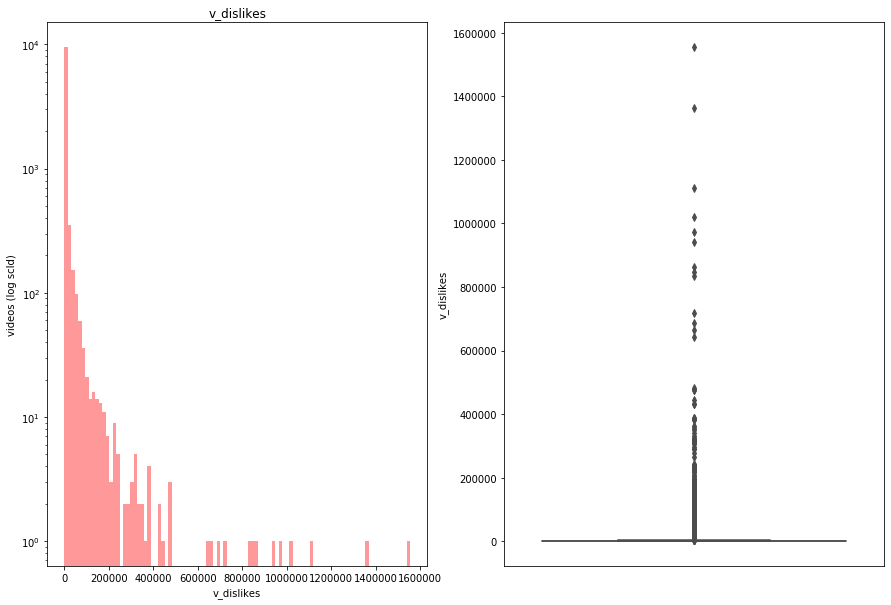

In [34]:
plot_attribute('v_dislikes', 'log', color='red')

#### Least dislikes
In the following we look at the least disliked videos:

In [35]:
sorted_dislikes = df.sort_values(by=['v_dislikes'], ascending=True)
sorted_dislikes.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
7230,HlN9jY-yyuA,30,Architecture of Aggression,Megadeth,29.0,0.0,217.0,5.0,2146
569,WZHA7GCX-Nk,30,A Very Respectable Hobbit,Howard Shore,13.0,0.0,84.0,5.0,1023
2292,2O6kPgeMurE,30,The Attic,Paul Weller,58.0,0.0,142.0,5.0,10020
8319,ZgyuIwa832Y,30,Chump,Green Day,5.0,0.0,174.0,5.0,352
4620,rXllND_LRf0,30,The Last Polka,Ben Folds Five,197.0,0.0,259.0,5.0,16404


#### Most dislikes
Furthermore, we inspect the videos with the most dislikes:

In [36]:
sorted_dislikes.tail()[::-1]

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
2171,My2FRPA3Gf8,30,Wrecking Ball,Miley Cyrus,5419945.0,1555113.0,221.0,4.108186,1055364657
2043,LrUvu1mlWco,30,We Can't Stop,Miley Cyrus,3772655.0,1363910.0,213.0,3.937882,875538230
4381,0KSOMA3QBU0,30,Dark Horse,Katy Perry,9700774.0,1112115.0,225.0,4.588596,2721476508
1091,4GuqB1BQVr4,30,Boyfriend,Justin Bieber,4509750.0,1020224.0,211.0,4.262041,772678855
7537,T6j4f8cHBIM,30,Stupid Hoe,Nicki Minaj,816041.0,974259.0,210.0,2.823250,116636048


## Average Rating
Furthermore, youtube video metadata provides us with so called average ratings 
of the videos so we will shortly take a look at them:

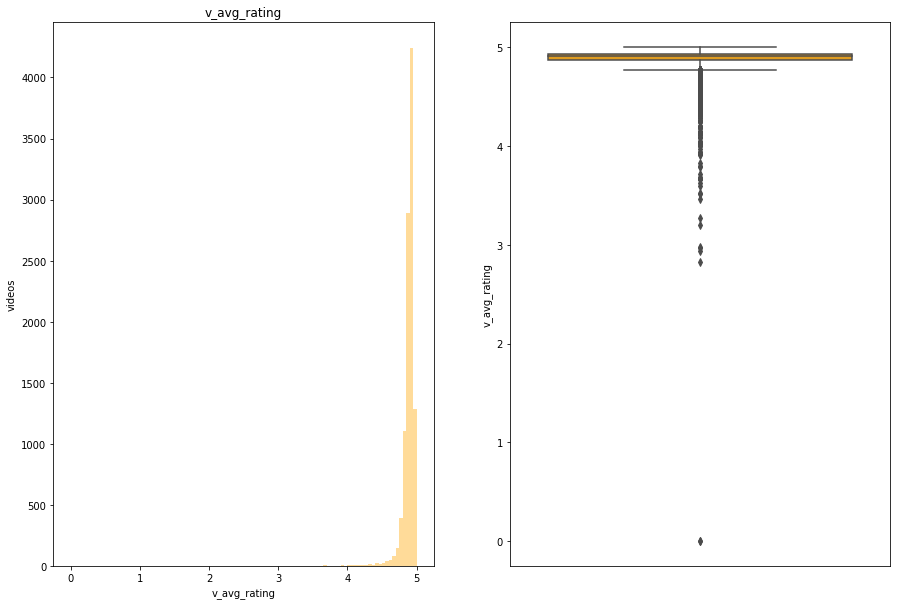

In [37]:
plot_attribute('v_avg_rating', color='orange')

## Connections
At last, we want to check the relations between the different features. 
Here we can see that the relation between likes and dislikes is not linear, thus 
a video tends to have more likes than dislikes. 

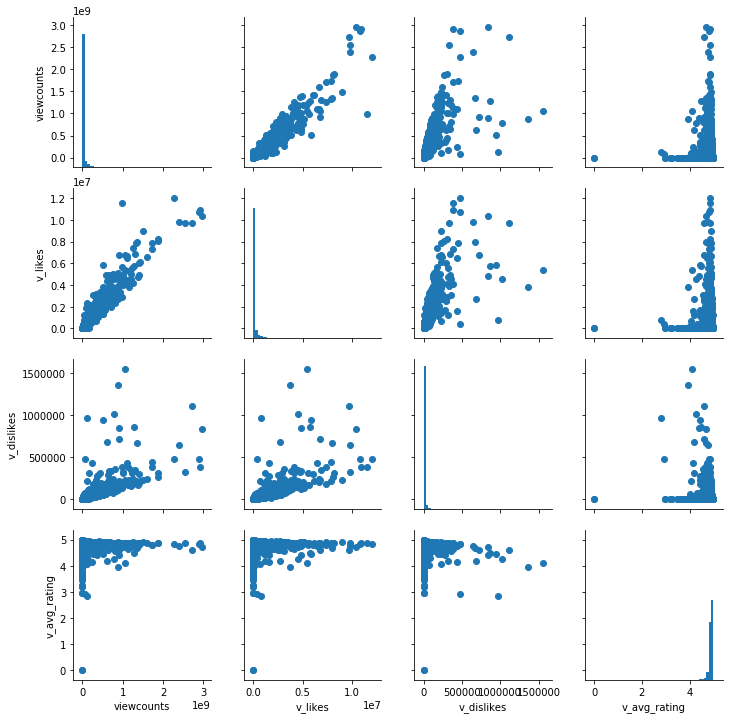

In [39]:
pair_grid = sns.PairGrid(data=df[['viewcounts', 'v_likes', 'v_dislikes', 'v_avg_rating']])
pair_grid.map_offdiag(plt.scatter)
pair_grid.map_diag(plt.hist, bins=50)
plt.show()

# LIKE/DISLIKE RATIO
TODO maybe investigate this ratio

## Conclusion
Overall, it can be said that the number of views, the likes and the dislikes appear to be distributed exponentially.
Furthermore, likes tend to be higher than the amount of dislikes. 
It is also interesting that there is a big chunk of videos located in the interval of 350k to 13kk views and 
that there are many outliers or extremal points having far higher viewcounts even reaching billions.


## Appendix
### Comparison of test/train set

In [42]:
y_test.describe()

,v_views
count,1.039000e+03
mean,4.015705e+07
std,1.671008e+08
min,1.300000e+02
25%,2.101360e+05
50%,2.002717e+06
75%,1.379782e+07
max,2.953195e+09


In [43]:
y_train.describe()



,v_views
count,9.344000e+03
mean,3.473709e+07
std,1.307459e+08
min,2.100000e+01
25%,2.183450e+05
50%,2.025127e+06
75%,1.375431e+07
max,2.916274e+09


In [44]:
y_train.describe() - y_test.describe()


,v_views
count,8.305000e+03
mean,-5.419961e+06
std,-3.635495e+07
min,-1.090000e+02
25%,8.209000e+03
50%,2.241000e+04
75%,-4.350875e+04
max,-3.692043e+07


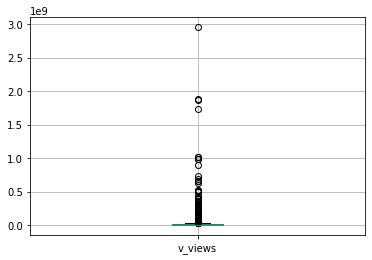

In [46]:
y_test.boxplot()

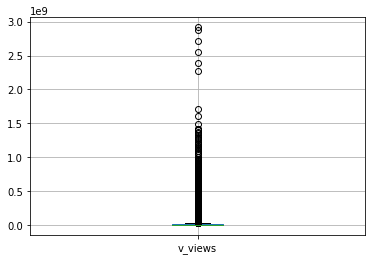

In [47]:
y_train.boxplot()